In [5]:
%cd ~/fur/
import math
import numpy as np
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
shift_03_10_2020.show_waveform_file_names()
waveforms_dir = shift_03_10_2020.get_waveforms_dir()


/home/ilobach/fur
0 RefCurve_2020-03-10_10_121356.Wfm.bin
1 RefCurve_2020-03-10_11_121907.Wfm.bin
2 RefCurve_2020-03-10_12_122451.Wfm.bin
3 RefCurve_2020-03-10_13_123150.Wfm.bin
4 RefCurve_2020-03-10_14_123409.Wfm.bin
5 RefCurve_2020-03-10_15_123707.Wfm.bin
6 RefCurve_2020-03-10_16_124126.Wfm.bin
7 RefCurve_2020-03-10_17_124538.Wfm.bin
8 RefCurve_2020-03-10_18_125040.Wfm.bin
9 RefCurve_2020-03-10_19_125407.Wfm.bin
10 RefCurve_2020-03-10_1_113153.Wfm.bin
11 RefCurve_2020-03-10_20_125657.Wfm.bin
12 RefCurve_2020-03-10_2_113530.Wfm.bin
13 RefCurve_2020-03-10_3_113943.Wfm.bin
14 RefCurve_2020-03-10_4_114207.Wfm.bin
15 RefCurve_2020-03-10_5_114546.Wfm.bin
16 RefCurve_2020-03-10_6_114948.Wfm.bin
17 RefCurve_2020-03-10_7_115153.Wfm.bin
18 RefCurve_2020-03-10_8_115935.Wfm.bin
19 RefCurve_2020-03-10_9_120443.Wfm.bin


In [6]:
test_file = shift_03_10_2020.get_waveform_path('RefCurve_2020-03-10_1_113153.Wfm.bin')
ch1, ch2 = read_waveform(test_file)

In [7]:
ch = ch2#[:2665*10]
# cfft = np.fft.rfft(ch)
# fft = np.absolute(cfft)
# plt.plot(ch)
# plt.axvline(1250)
# plt.axvline(1250+3300)

In [9]:
filtered = scipy.signal.savgol_filter(ch,101,3)
#plt.plot(filtered)

In [10]:
resampling_factor = 5
reduced_ch = filtered[::resampling_factor]
#plt.plot(reduced_ch)

In [11]:
dt0 = 0.04  # ns
dt = resampling_factor*dt0
freq = np.fft.rfftfreq(len(reduced_ch), dt)

In [12]:
fftc = np.fft.rfft(reduced_ch)
fft = np.absolute(fftc)

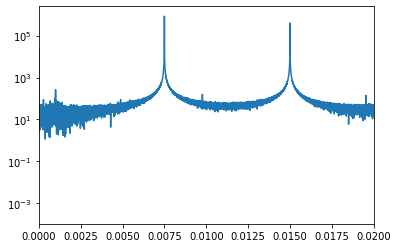

In [13]:
plt.plot(freq, fft)
plt.xlim(0,0.02)
plt.yscale('log')

In [14]:
i_max = np.argmax(np.absolute(fft))

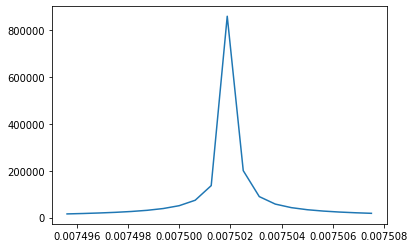

In [15]:
r1,r2 = i_max -10, i_max+10
plt.plot(freq[r1:r2],fft[r1:r2])

In [124]:
1/(2665*0.05)

0.0075046904315197

In [16]:
from scipy import signal

(0.0, 0.01)

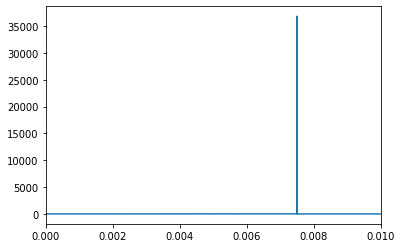

In [17]:
f, p = signal.periodogram(ch,1/0.04)


In [ ]:
i_max = np.argmax(p)

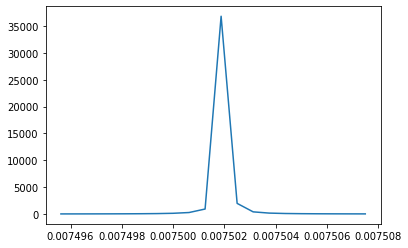

In [20]:
r1,r2 = i_max -10, i_max+10
plt.plot(f[r1:r2],p[r1:r2])

In [ ]:
ch = ch2[:2665*100]
period_est = 2665
ch_for_conv =  ch[:-2*period_est]
l = len(ch_for_conv)
sh = 0
np.interp()

In [195]:
def CalcAmpFluct(file_name):
    ch2, ch1 = read_waveform(file_name)

    n0=2640
    cut = 200
    ch1 = ch1[cut*n0:-cut*n0]
    ch2 = ch2[cut*n0:-cut*n0]

    ch1Min = min(ch1)
    ch1 = [c1-ch1Min for c1 in ch1]

    n0=2640

    amplitude = max(ch1)-min(ch1)
    tl = amplitude/2+min(ch1)
    trig_times = []
    n_tc = 30
    y0=0
    for x in range(n_tc,len(ch1)):
        y=ch1[x]
        if y0<tl and y>tl and ch1[x-n_tc]<tl and ch1[x+n_tc]>tl:
            X = [i-x for i in range(x-n_tc,x+n_tc)]
            Y = [j-tl for j in ch1[x-n_tc:x+n_tc]]
            XY = [i*j for i,j in zip(X,Y)]
            X2 = [i**2 for i in X]
            m = (np.mean(XY)-np.mean(X)*np.mean(Y))/(np.mean(X2)-np.mean(X)**2)
            b = np.mean(Y)-m*np.mean(X)
            trig_times.append(x-b/m)
        y0=y
        x+=1000

    periods = [0]*(len(trig_times)-1)
    for i in range(len(periods)):
        periods[i]=trig_times[i+1]-trig_times[i]
    periods = [p for p in periods if p>0.9*n0]

    mean_period = np.mean(periods)
    print("mean_period =",mean_period)
    T=mean_period
    periods_std = np.std(periods)
    print("periods_std =",periods_std)
    period_error = periods_std/math.sqrt(len(periods))
    print("period_error =",period_error)
    
    del periods

    time_shift = -trig_times[1]+200
    ts = [(t+time_shift)%T for t in range(len(ch1))]

    T_int = math.ceil(T)
    T_int

    p = 1*T_int
    tt = ts[0:p]
    cc = ch1[0:p]

    int_xs = range(T_int)
    itp = interp1d(tt,cc)
    cc_savgol = list(scipy.signal.savgol_filter(itp(int_xs[1:-1]),51,3))
    cc_savgol = [cc_savgol[0]]+cc_savgol+[cc_savgol[-1]]

    del ch1

    n_bins =  T_int
    binned_ch2 = [[] for i in range(n_bins)]
    for i in range(len(ts)):
        t = ts[i]
        j = math.floor(n_bins*t/T)
        binned_ch2[j].append(ch2[i])

    var_ch2 = [np.var(correct_his(i)) for i in binned_ch2]
    
    del binned_ch2

    # plt.plot(var_ch2)
    # plt.show()

    def finite_diff(ch1t,diff_n):
        ch1_diff = [0]*len(ch1t)
        for i in range(diff_n+1,len(ch1_diff)-diff_n-1):
            ch1_diff[i]=least_squares_0(range(-diff_n,diff_n+1),ch1t[i-diff_n:i+diff_n+1])
        return ch1_diff

    int_xs = range(T_int)
    int_ch1 = cc_savgol# [f1(i) for i in int_xs]

    int_ch1_c = int_ch1
    var_ch2_c = var_ch2_c = list(scipy.signal.savgol_filter(var_ch2,101,3))
    plt.plot(var_ch2_c,"x")

    index,value = max(enumerate(int_ch1_c),key=operator.itemgetter(1))
    delta = 30
    plt.axvline(index-delta,color='r')
    plt.axvline(index+delta,color='r')
    h2 = np.mean(var_ch2_c[index-delta:index+delta])

    m1,m2,m3,m4=0,60,1400,1900
   
    plt.axvline(m3,color='g')
    plt.axvline(m4,color='g')

    h1 = np.mean(var_ch2_c[m3:m4])

    plt.axhline(h1,color='b')
    plt.axhline(h2,color='b')

    min_int_ch1_c=min(int_ch1_c)
    s_amp = (value-min(int_ch1_c))/2
    a0 = s_amp*2/0.7
    fluct = (h2-h1)/2/s_amp**2
    fluct_V = a0**2*fluct
    ch1_rescaled = [h1+(h2-h1)/(value-min_int_ch1_c)**2*(i-min_int_ch1_c)**2 for i in int_ch1_c]
    plt.plot(ch1_rescaled,color='yellow')


    plt.show()



    print("fluct_V =",fluct_V,"V^2")
    print("a0 =",a0,"V")
    print("fluct = ",fluct)

    with open(path.join(directory,"new_data_analyzer_3_31_6_better_signal_averaging_new.txt"), 'a') as the_file:
                    the_file.write(file+";"+str(a0)+";"+str(fluct_V)+";"+str(fluct)+"\n")
    print("Done with "+file)
    print("----------------------------------------------------------------------------------------------------------")

    return [file_name,a0,fluct_V,fluct]

In [196]:
CalcAmpFluct(test_file)

mean_period = 3332.431636818763
periods_std = 0.4773606065439201


NameError: name 'math' is not defined